In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
num_dots = 1000
num_clusters = 3
num_epochs = 100

In [3]:
dots = []
for i in range(num_dots):
    if np.random.random() > 0.66:
        dots.append([np.random.normal(0.0, 1.0), np.random.normal(2.0, 0.5)])
    elif np.random.random() > 0.33:
        dots.append([np.random.normal(2.0, 1.3), np.random.normal(-1.0, 0.6)])
    else:
        dots.append([np.random.normal(-1.0, 0.8), np.random.normal(-2.0, 1.2)])

In [4]:
df = pd.DataFrame({"x": [v[0] for v in dots], "y": [v[1] for v in dots]})
df.head(10)

,x,y
0,1.199427,2.221597
1,2.514226,-0.462030
2,0.254076,1.526500
3,3.179233,-1.458477
4,1.641915,-1.047704
5,-1.345078,-0.998424
6,-0.434264,1.986363
7,3.430256,-0.396843
8,-0.318878,1.788378
9,-1.979320,-2.333233


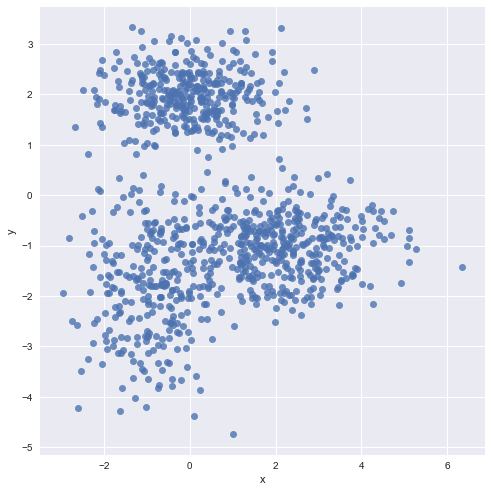

In [5]:
sb.lmplot("x", "y", data = df, fit_reg = False, size = 7)
plt.show()

In [6]:
vectors = tf.constant(dots)
vectors.get_shape()

TensorShape([Dimension(1000), Dimension(2)])

In [15]:
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [num_clusters, -1]))
centroids.get_shape()

TensorShape([Dimension(3), Dimension(2)])

In [12]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

(1, 1000, 2)
(3, 1, 2)


In [16]:
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)
assignments.get_shape()

TensorShape([Dimension(1000)])

In [17]:
means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])), reduction_indices = [1]) for c in range(num_clusters)], 0)

In [18]:
centroids_updated = tf.assign(centroids, means)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(num_epochs):
        _, centroid_values, assignment_values = sess.run([centroids_updated, centroids, assignments])
print("center")
print(centroid_values)

center
[[ 2.4839797  -1.02455211]
 [-0.03284787  1.93691313]
 [-0.63352448 -1.72061038]]


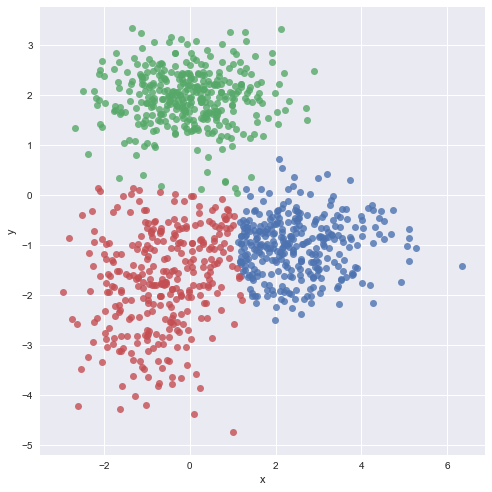

In [20]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
    data["x"].append(dots[i][0])
    data["y"].append(dots[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sb.lmplot("x", "y", data = df, fit_reg = False, size = 7, hue = "cluster", legend = False)
plt.show()